In [6]:
import healpy as hp
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
# read counts map fits file
# f = fits.open("counts_P8_P302_Source_z90_w009_w465_healpix_o6_30bins.fits")
# alternatively use "o7" which has a better resolution (will be slower)
f = fits.open("counts_P8_P302_Source_z90_w009_w465_healpix_o7_30bins.fits")
print f.info()

d = f[1].data

Filename: counts_P8_P302_Source_z90_w009_w465_healpix_o7_30bins.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SKYMAP        1 BinTableHDU     20   196608R x 1C   [30D]   
  2  ENERGIES      1 BinTableHDU     12   30R x 1C   [1D]   
None


<Figure size 432x288 with 0 Axes>

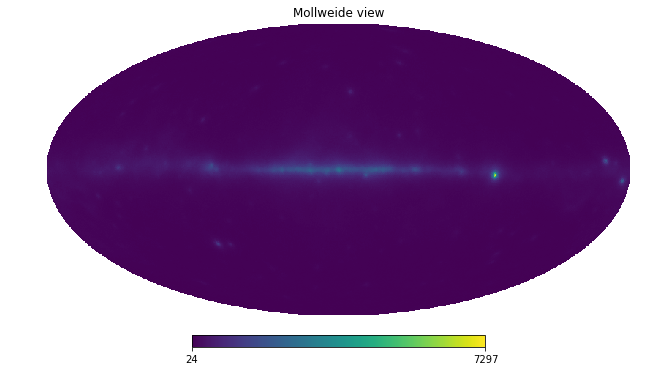

In [32]:
plt.figure()
eBins = len(d['Spectra'][0])
eBin = 4
if (eBin<eBins) and (eBin>=0):
    hp.mollview(d['Spectra'][:,eBin])
else:
    print "invalid energy bin %i"%eBin

Sigma is 63.699135 arcmin (0.018529 rad) 
-> fwhm is 150.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<Figure size 432x288 with 0 Axes>

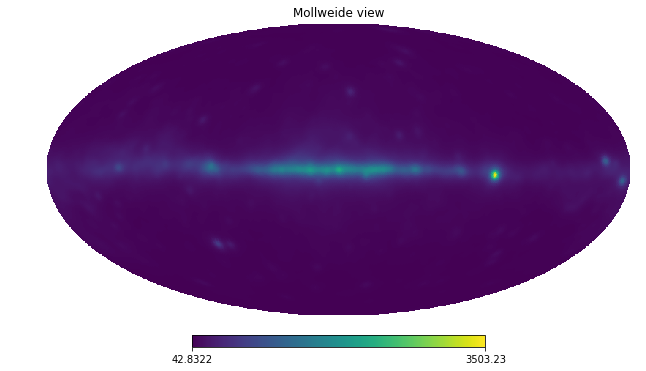

In [23]:
# play with smoothing
plt.figure()

eBin = 5
if (eBin<eBins) and (eBin>=0):
    map_in = d['Spectra'][:,eBin]
    map_out = hp.sphtfunc.smoothing(map_in, fwhm = np.deg2rad(2.5), iter = 1)
    hp.mollview(map_out)
else:
    print "invalid energy bin %i"%eBin

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
10114.414585531516


<Figure size 432x288 with 0 Axes>

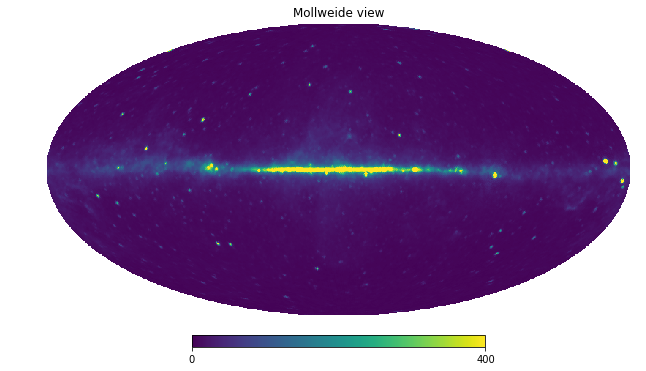

In [30]:
# try to find Fermi bubbles
# first add energies >10GeV up

# energie bins (I think it's the central value)
energies = f[2].data

# so we want to count from bin 14

summed_map = np.zeros_like(d['Spectra'][:,0])

for i in range(12,eBins-1):
    summed_map += d['Spectra'][:,i]

plt.figure()
summed_map = hp.sphtfunc.smoothing(summed_map, fwhm = np.deg2rad(1.0), iter = 1)
hp.mollview(summed_map, min=0, max=400)

print max(summed_map)
